In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [81]:
df = pd.read_csv('../Datathon Materials/packages.csv')
df

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner
0,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True
1,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart is getting schooled by another retaile...,NaN,3033,122,False,False
2,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart may not be crapping their pants over t...,NaN,3092,110,False,False
3,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False
4,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546d900426714cd2dd00002e,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3506,120,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150812,2014-11-20,2014-11-17,546d564284ad3817bc000025,An Artist Animates The Ugly Truth We Should Al...,546d574a9ad54e2af0000020,Things that matter. Pass 'em on.,<p>Sad but true: It took the deaths of several...,an-artist-animates-the-ugly-truth-we-should-al...,NaN,NaN,10011,53,False,False
150813,2014-11-20,2014-11-17,546d702084ad380752000038,They're Being Called 'Walmart's Worst Nightmar...,546d2dcd9ad54e2af000000a,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,NaN,NaN,10137,169,False,False
150814,2014-11-20,2014-11-17,546d702084ad380752000038,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54ec1f9000017,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,NaN,NaN,9955,315,False,False
150815,2014-11-20,2014-11-17,546d702084ad380752000038,They're Being Called 'Walmart's Worst Nightmar...,546d6fa126714c0538000040,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,NaN,NaN,10055,291,False,False


In [70]:
df2 = pd.read_csv('../Datathon Materials/analytics_daily_users.csv')
df2

,date,users,new_users,sessions_per_user,sessions,session_duration,bounce_rate,pageviews,pages_per_session
0,2013-01-01,"67,283","17,706",1.05,"68,825",0:01:46,80.00%,"82,590",1.15
1,2013-01-02,"123,942","53,118",1.03,NaN,0:01:25,72.22%,NaN,1.44
2,2013-01-03,"194,766","88,530",1.13,NaN,0:01:05,77.42%,NaN,1.31
3,2013-01-04,"237,261","123,942",1.09,NaN,0:02:09,87.67%,NaN,1.15
4,2013-01-05,"134,566","60,200",1.13,NaN,0:01:35,76.74%,NaN,1.26
...,...,...,...,...,...,...,...,...,...
845,2015-04-26,"779,065","371,826",1.09,"850,679",0:00:41,90.42%,"1,026,871",1.25
846,2015-04-27,"878,218","322,249",1.09,"958,046",0:01:27,84.44%,"1,227,841",1.27
847,2015-04-28,"1,327,951","644,499",1.07,"1,428,810",0:00:54,88.34%,"1,720,629",1.15
848,2015-04-29,"1,416,481","757,817",1.06,"1,494,882",0:00:47,89.10%,"1,739,900",1.18


In [3]:
def time_convert(x):
    h,m,s = map(int,x.split(':'))
    return (h*60+m)*60+s

def perc_to_float(x):
    return float(x[:-1])

In [6]:
df2['bounce_rate_float'] = df2['bounce_rate'].apply(perc_to_float)
df2['bounce_rate_float']

0      80.00
1      72.22
2      77.42
3      87.67
4      76.74
       ...  
845    90.42
846    84.44
847    88.34
848    89.10
849    87.64
Name: bounce_rate_float, Length: 850, dtype: float64

In [7]:
df2['session_duration_float'] = df['session_duration'].apply(time_convert)

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 20]

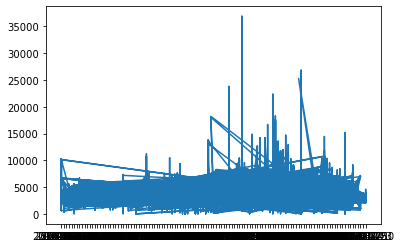

In [69]:
plt.plot(df['test_week'], df['impressions'])
plt.show()

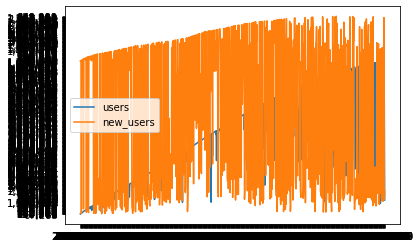

In [75]:
plt.plot(df2['date'], df2['users'])
plt.plot(df2['date'], df2['new_users'])
plt.legend(['users', 'new_users'])
plt.show()


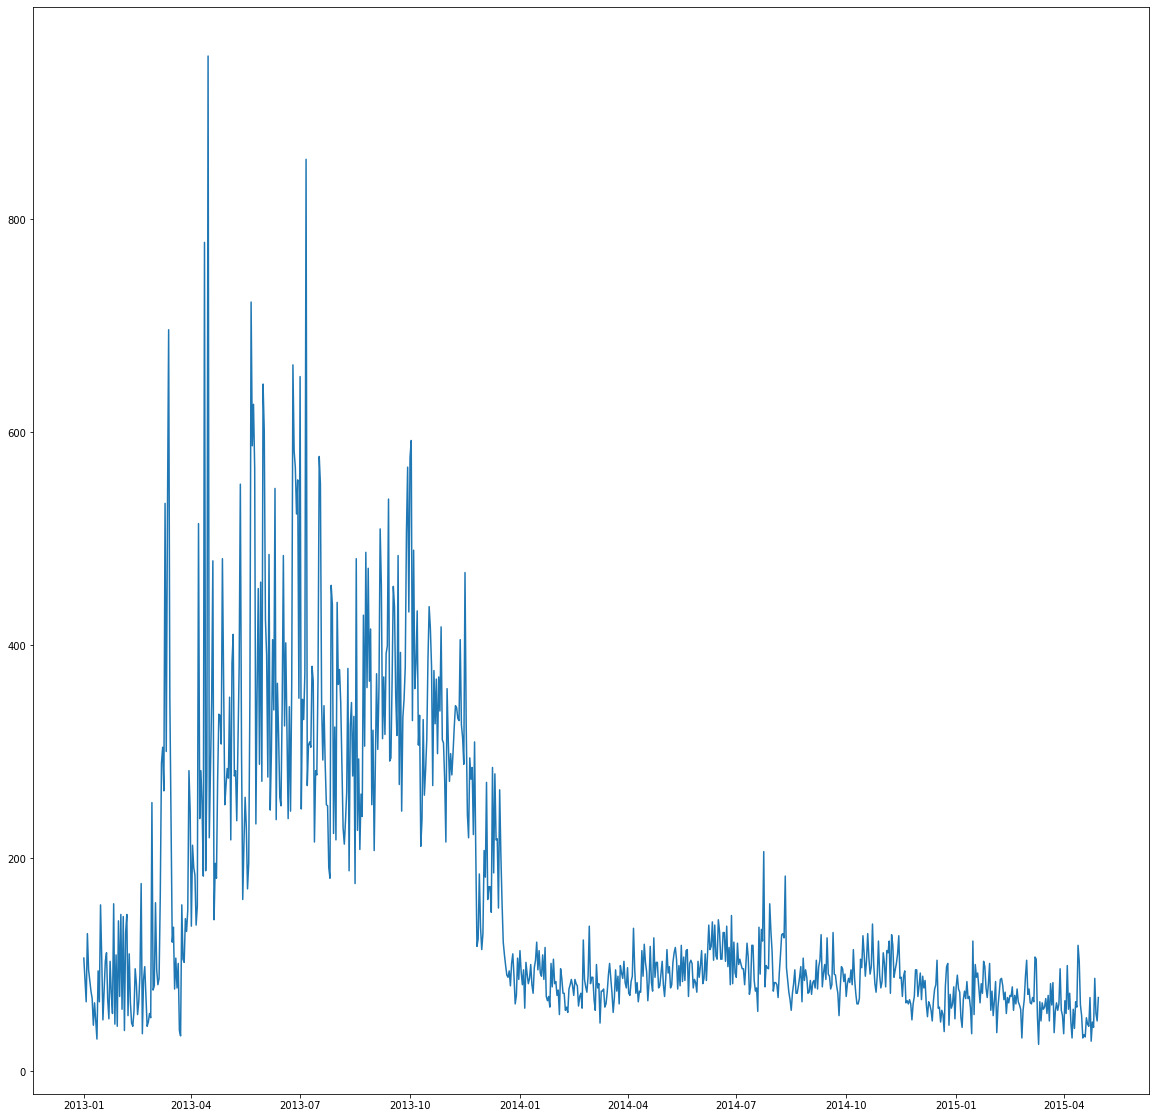

In [16]:
plt.plot(df['date'], df['session_duration_float'])
plt.show()

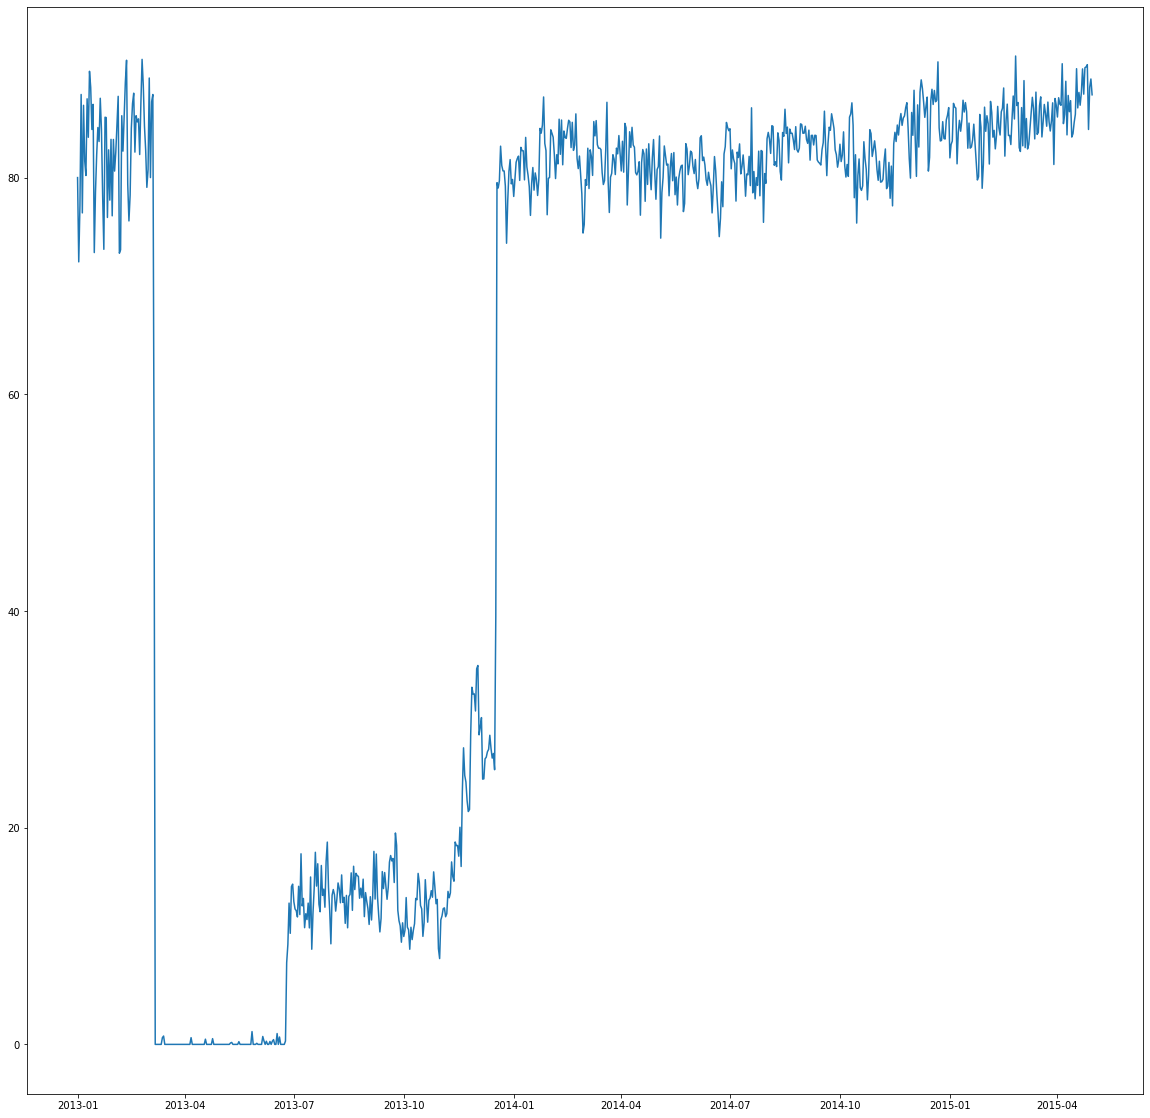

In [17]:
plt.plot(df['date'], df['bounce_rate_float'])
plt.show()
# plt.show(figsize=(20, 20))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    850 non-null    datetime64[ns]
 1   users                   850 non-null    object        
 2   new_users               850 non-null    object        
 3   sessions_per_user       850 non-null    float64       
 4   sessions                546 non-null    object        
 5   session_duration        850 non-null    object        
 6   bounce_rate             850 non-null    object        
 7   pageviews               546 non-null    object        
 8   pages_per_session       850 non-null    float64       
 9   bounce_rate_float       850 non-null    float64       
 10  session_duration_float  850 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 73.2+ KB


In [10]:
# is the data balanced
num_true = 0
num_false = 0
for item in df["first_place"]:
    if item == True:
        num_true += 1
    if item == False:
        num_false += 1
print("true: ", num_true)
print("false: ", num_false)
print("percent: ", num_true/(num_true+num_false))

true:  32122
false:  118695
percent:  0.21298659965388517


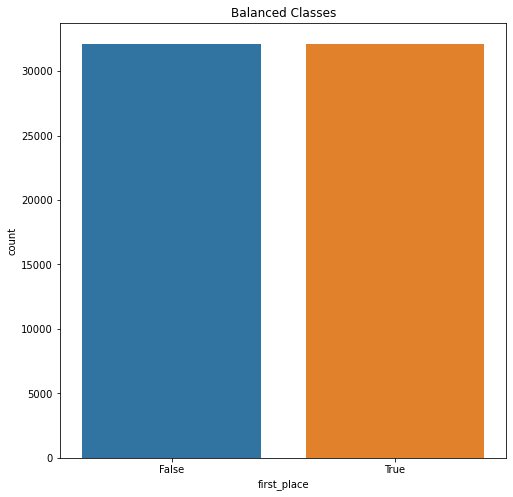

In [58]:
# using UNDERSAMPLING techniques...
shuffled_df = df.sample(frac=1,random_state=4)
true_df = shuffled_df.loc[shuffled_df['first_place'] == True]
# undersampling the oversampled class to balance the dataset
false_df = shuffled_df.loc[shuffled_df['first_place'] == False].sample(n=32122,random_state=42)
balanced_data = pd.concat([false_df, true_df])
# visualization of balance
plt.figure(figsize=(8, 8))
sns.countplot(x='first_place', data=balanced_data)
plt.title('Balanced Classes')
plt.show()

In [59]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64244 entries, 81004 to 94601
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   64244 non-null  object 
 1   test_week    64244 non-null  object 
 2   test_id      64244 non-null  object 
 3   headline     64244 non-null  object 
 4   image_id     64170 non-null  object 
 5   excerpt      57406 non-null  object 
 6   lede         64202 non-null  object 
 7   slug         64244 non-null  object 
 8   share_text   8919 non-null   object 
 9   share_image  22102 non-null  object 
 10  impressions  64244 non-null  int64  
 11  clicks       64244 non-null  int64  
 12  first_place  64244 non-null  bool   
 13  winner       64244 non-null  bool   
 14  0            64244 non-null  float64
 15  1            64244 non-null  float64
 16  2            64244 non-null  float64
 17  3            64244 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(1

In [60]:
y = balanced_data["first_place"].astype(int)
y.head()

81004     0
26118     0
104039    0
61428     0
108333    0
Name: first_place, dtype: int64

In [39]:
import nltk

In [40]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chelseyywang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chelseyywang/nltk_data...


True

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [47]:
def get_score(text):
    d = sia.polarity_scores(text)
    return d["neg"], d["neu"], d["pos"], d["compound"]

In [61]:
# appiled_df = df.apply(lambda row: fn(row.text), axis='columns', result_type='expand')
# >>> df = pd.concat([df, appiled_df], axis='columns')
temp_df = balanced_data.apply(lambda row: get_score(str(row['headline'])), axis='columns', result_type='expand')
temp_df.columns = ['headline_neg', 'headline_neu', 'headline_pos', 'headline_compound']
balanced_data = pd.concat([balanced_data, temp_df], axis='columns')

In [82]:
temp_df = df.apply(lambda row: get_score(str(row['headline'])), axis='columns', result_type='expand')
temp_df.columns = ['headline_neg', 'headline_neu', 'headline_pos', 'headline_compound']
df = pd.concat([df, temp_df], axis='columns')
df.head()

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner,headline_neg,headline_neu,headline_pos,headline_compound
0,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True,0.218,0.479,0.303,0.1531
1,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart is getting schooled by another retaile...,NaN,3033,122,False,False,0.218,0.479,0.303,0.1531
2,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart may not be crapping their pants over t...,NaN,3092,110,False,False,0.218,0.479,0.303,0.1531
3,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False,0.000,0.737,0.263,0.3612
4,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546d900426714cd2dd00002e,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3506,120,True,False,0.000,0.737,0.263,0.3612


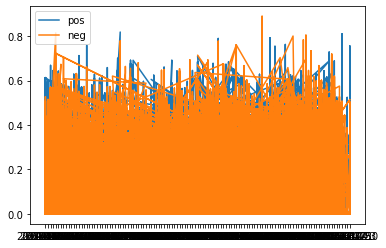

In [87]:
plt.plot(df['test_week'], df['headline_pos'])
plt.plot(df['test_week'], df['headline_neg'])
# plt.plot(df['test_week'], df['headline_neu'])
plt.legend(['pos', 'neg'])
plt.show()

In [62]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64244 entries, 81004 to 94601
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   created_at         64244 non-null  object 
 1   test_week          64244 non-null  object 
 2   test_id            64244 non-null  object 
 3   headline           64244 non-null  object 
 4   image_id           64170 non-null  object 
 5   excerpt            57406 non-null  object 
 6   lede               64202 non-null  object 
 7   slug               64244 non-null  object 
 8   share_text         8919 non-null   object 
 9   share_image        22102 non-null  object 
 10  impressions        64244 non-null  int64  
 11  clicks             64244 non-null  int64  
 12  first_place        64244 non-null  bool   
 13  winner             64244 non-null  bool   
 14  0                  64244 non-null  float64
 15  1                  64244 non-null  float64
 16  2                 

In [63]:
balanced_data.head()

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,...,first_place,winner,0,1,2,3,headline_neg,headline_neu,headline_pos,headline_compound
81004,2014-03-08,2014-03-03,531b4a7508ce4edb77000037,A Dude Film Director Has Never Been Asked The ...,5332b5c71fae79f09f0007da,Things that matter. Pass 'em on.,<p>\n\tFrozen just broke $1 billion in worldwi...,a-dude-film-director-has-never-been-asked-the-...,NaN,frozens7-c82c209137e979aa855bdbdbe975e23b.jpg,...,False,False,0.161,0.839,0.000,-0.3612,0.161,0.839,0.000,-0.3612
26118,2013-04-12,2013-04-08,516887822547f9000200fa6b,These Soldiers Crossed The Rubicon. Watch Them...,5332bac21fae79f09f003fc0,Ready to restore your faith in America?,<p>Ready to restore your faith in America? A g...,these-soldiers-crossed-the-rubicon-watch-them-...,NaN,soldiers.jpg,...,False,False,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
104039,2014-09-15,2014-09-15,5410bd4b5856e96e05000056,A Human Quality These Chimps Could Understand ...,54106cb01aec80a2ab000077,Things that matter. Pass 'em on.,<p>They tried to tell her what to do. They tri...,a-human-quality-these-chimps-could-understand-...,NaN,NaN,...,False,False,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
61428,2013-07-30,2013-07-29,51f80a958e401ce1de00015e,"If You Still Don't Think We Need Feminism, You...",5332bdd01fae79f09f008a59,Things that matter. Pass 'em on.,"<p>\n\t Sometimes, being a feminist is seen a...",if-you-still-dont-think-we-need-feminism-you-s...,NaN,Thumbnail4-30.jpg,...,False,False,0.194,0.806,0.000,-0.6249,0.194,0.806,0.000,-0.6249
108333,2014-10-09,2014-10-06,5436942cb8ab49736b000042,When Her Mother Realized There'd Be No Miracle...,5435a6b99f48007d05000077,Things that matter. Pass 'em on.,<p>She wants to do this on her own terms. I'm ...,when-her-mother-realized-thered-be-no-miracle-...,I keep thinking about the relief she says she ...,NaN,...,False,False,0.101,0.642,0.257,0.5267,0.101,0.642,0.257,0.5267


In [64]:
X = balanced_data[["impressions", "clicks", "headline_pos", "headline_neu", "headline_neg", "headline_compound"]]
X.head()

,impressions,clicks,headline_pos,headline_neu,headline_neg,headline_compound
81004,3054,140,0.000,0.839,0.161,-0.3612
26118,3027,53,0.000,1.000,0.000,0.0000
104039,3642,32,0.000,1.000,0.000,0.0000
61428,2746,231,0.000,0.806,0.194,-0.6249
108333,4455,42,0.257,0.642,0.101,0.5267


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train, y_train)
predicted = rf_clf.predict(X_test)
score = rf_clf.predict_proba(X_test)[:,1]
print("%-12s %f" % ('Random Forest Accuracy:', metrics.accuracy_score(y_test, predicted)))

Random Forest Accuracy: 0.564013


In [67]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(max_iter=1000)
nn_clf.fit(X_train, y_train)
predicted = nn_clf.predict(X_test)
score = nn_clf.predict_proba(X_test)[:,1]
print("%-12s %f" % ('Neural Net Accuracy:', metrics.accuracy_score(y_test, predicted)))
print("%-12s %f" % ('Neural Net F1:', metrics.f1_score(y_test, predicted)))

Neural Net Accuracy: 0.520741
Neural Net F1: 0.141623
